In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import glob

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
import cufflinks as cf

In [6]:
data=pd.read_csv('project 4 data.csv')

In [7]:
data.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [9]:
data.isnull().any().sum()

0

In [10]:
data.isnull().any()

ID                     False
class                  False
gender                 False
race                   False
GPA                    False
Algebra                False
Calculus1              False
Calculus2              False
Statistics             False
Probability            False
Measure                False
Functional_analysis    False
from1                  False
from2                  False
from3                  False
from4                  False
y                      False
dtype: bool

In [11]:
df = pd.DataFrame(data)
duplicate_rows = df.duplicated()
duplicate_count = duplicate_rows.sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])

Number of duplicate rows: 0


 # 1.What is the average GPA for each class?

In [12]:

average_gpa = df.groupby('class')['GPA'].mean()
print(average_gpa)

class
A    82.844605
B    83.251724
Name: GPA, dtype: float64


# 1.GPA Distribution:  Create a histogram showing the distribution of GPAs. 

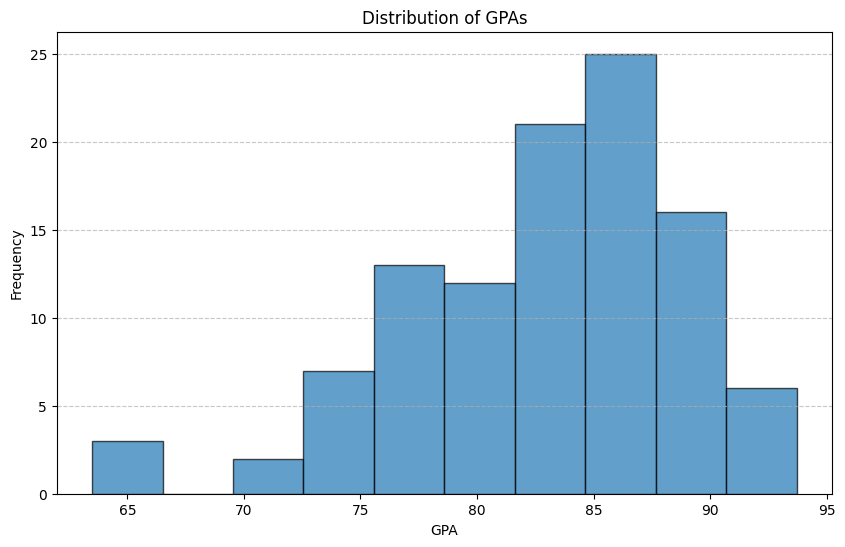

In [13]:

plt.figure(figsize=(10, 6))
plt.hist(df['GPA'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of GPAs')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2.Gender Performance Comparison:  How do male and female students compare in terms of average GPA? 

In [14]:
average_gpa_by_gender = df.groupby('gender')['GPA'].mean()
print(average_gpa_by_gender)

gender
female    83.558235
male      81.852162
Name: GPA, dtype: float64


# 2.Average GPA by Gender:  Create a bar chart comparing average GPA between male and female students. 

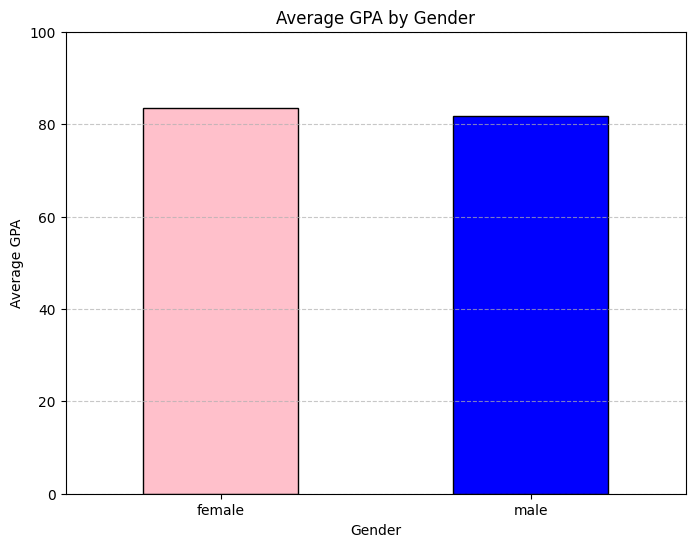

In [15]:
plt.figure(figsize=(8, 6))
average_gpa_by_gender.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')
plt.title('Average GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3.Race Performance Analysis:  What is the average GPA for students of different races? 

In [16]:
average_gpa_by_race = df.groupby('race')['GPA'].mean()
print(average_gpa_by_race)

race
1    83.909012
2    80.156667
3    81.388333
4    78.897500
5    73.400000
6    83.955000
7    81.592000
Name: GPA, dtype: float64


# 3.Average GPA by Race:  Create a bar chart comparing average GPA across different races. 

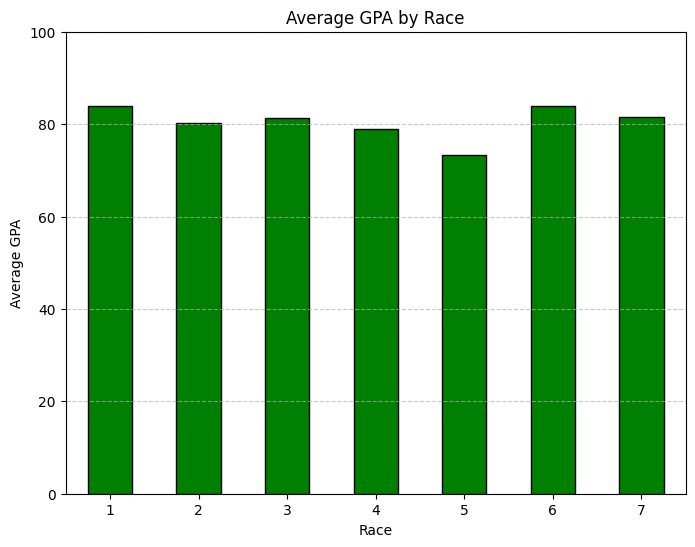

In [17]:
plt.figure(figsize=(8, 6))
average_gpa_by_race.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average GPA by Race')
plt.xlabel('Race')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 4.  Course Performance:  How do students perform in different courses (Algebra, Calculus1, Calculus2, Statistics, Probability, Measure, Functional_analysis)?

In [18]:
df = pd.DataFrame(data)
average_scores = df[['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']].mean()
print("Average Scores for Each Course:")
print(average_scores)

Average Scores for Each Course:
Algebra                76.057143
Calculus1              71.961905
Calculus2              78.942857
Statistics             85.133333
Probability            83.876190
Measure                80.761905
Functional_analysis    75.323810
dtype: float64


# 4.Course Score Trends:  Create line charts for the average scores in Algebra, Calculus1, Calculus2, Statistics, Probability, Measure, and Functional_analysis.

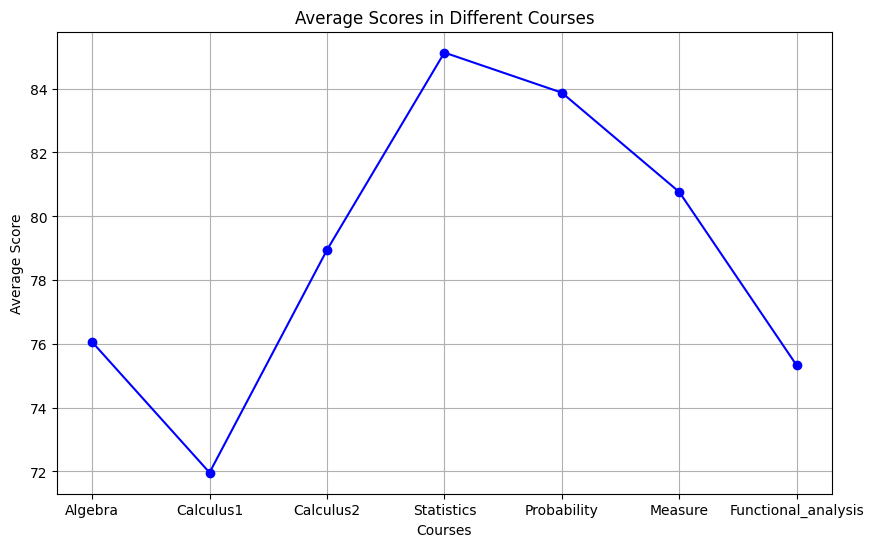

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(average_scores.index, average_scores.values, marker='o', linestyle='-', color='b')
plt.title('Average Scores in Different Courses')
plt.xlabel('Courses')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

# 5.Correlation with GPA:  What is the correlation between GPA and performance in individual courses? 

In [21]:
correlation_with_gpa =data[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']]

In [22]:
correlation_with_gpa.head()

,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
0,73.47,64,81,87,60,74,71,60
1,71.22,57,50,51,51,55,62,61
2,74.56,47,48,71,60,61,68,64
3,72.89,46,72,38,60,29,54,51
4,70.11,49,45,63,60,66,66,61


In [23]:
correlation_with_gpa.corr()

,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis
GPA,1.000000,0.761590,0.660560,0.803865,0.740903,0.732898,0.758676,0.809451
Algebra,0.761590,1.000000,0.608083,0.640578,0.759595,0.752480,0.755499,0.572575
Calculus1,0.660560,0.608083,1.000000,0.588929,0.547605,0.484766,0.471347,0.430825
Calculus2,0.803865,0.640578,0.588929,1.000000,0.640908,0.638694,0.658728,0.672529
Statistics,0.740903,0.759595,0.547605,0.640908,1.000000,0.716918,0.644505,0.469362
Probability,0.732898,0.752480,0.484766,0.638694,0.716918,1.000000,0.704155,0.547730
Measure,0.758676,0.755499,0.471347,0.658728,0.644505,0.704155,1.000000,0.596535
Functional_analysis,0.809451,0.572575,0.430825,0.672529,0.469362,0.547730,0.596535,1.000000


# 5.Correlation Heatmap:  Create a heatmap to visualize the correlation matrix of GPA and course scores. 

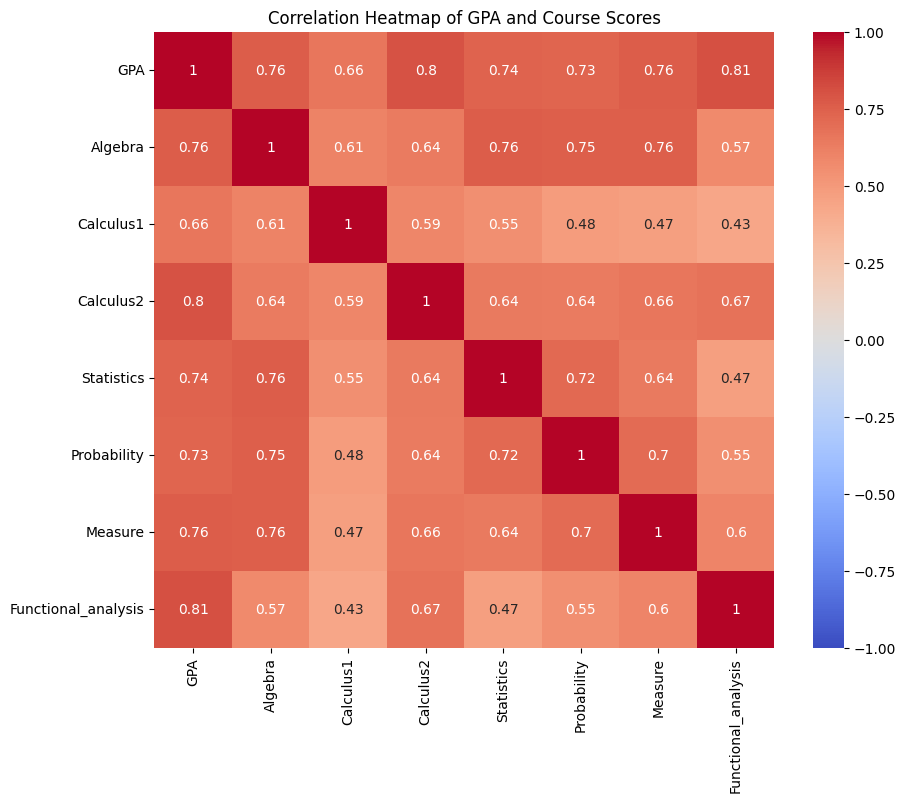

In [48]:
courses = ['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']
correlation_matrix = data[courses].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.title('Correlation Heatmap of GPA and Course Scores')
plt.show()


# 6.Performance Distribution:  What is the distribution of GPAs across all students?


In [32]:
gpa_statistics = data['GPA'].describe()

print(gpa_statistics)

count    105.000000
mean      82.957048
std        6.053187
min       63.490000
25%       79.340000
50%       84.110000
75%       87.300000
max       93.710000
Name: GPA, dtype: float64


# 6.Box Plot of GPA by Class:  Create a box plot to show the distribution of GPAs for each class. 


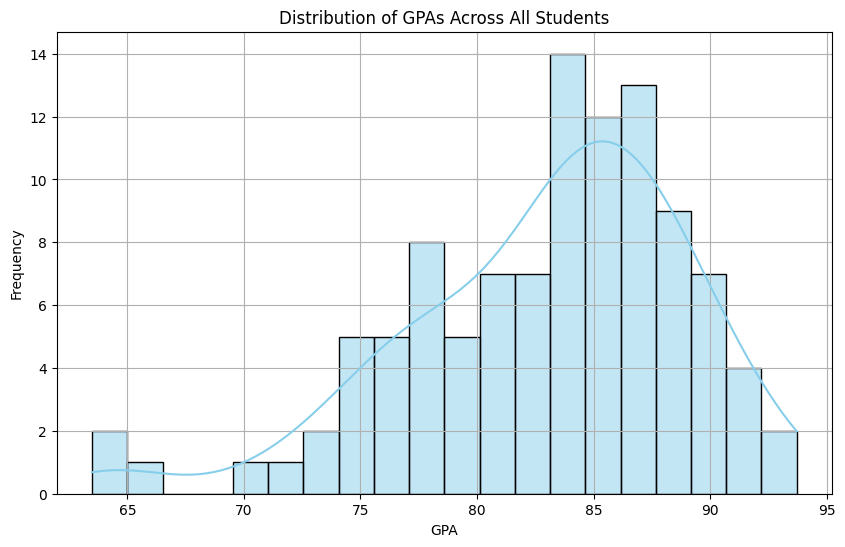

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of GPAs Across All Students')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 7.  Top Performers:  Who are the top 10 students in terms of GPA? 

In [39]:
df_sorted = df.sort_values(by='GPA', ascending=False)
top_10_students = df_sorted.head(10)
print(top_10_students[['ID', 'GPA']])
#top_10_students = data.nlargest(10, 'GPA')
#print(top_10_students.to_markdown(index=False))

       ID    GPA
104  1245  93.71
68   1209  93.06
75   1216  91.90
96   1237  91.74
93   1234  91.61
97   1238  91.14
41   1182  90.66
84   1225  90.62
98   1239  90.31
79   1220  89.95


# 7.  Scatter Plot of GPA vs. Course Scores:  Create scatter plots to show the relationship between GPA and each course score. 

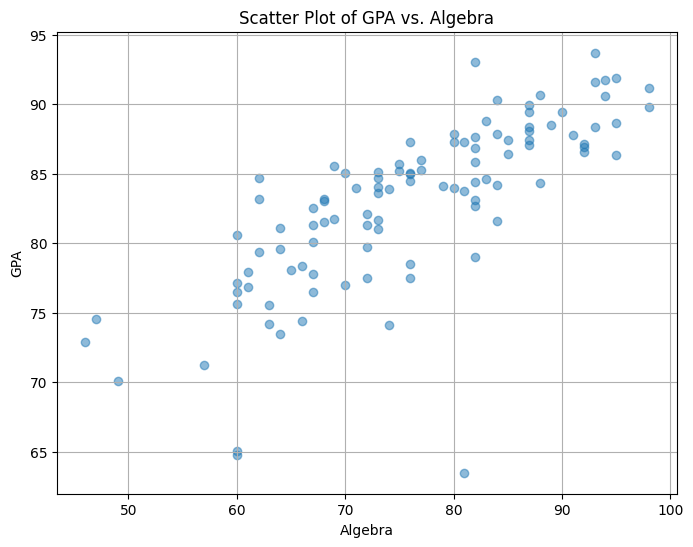

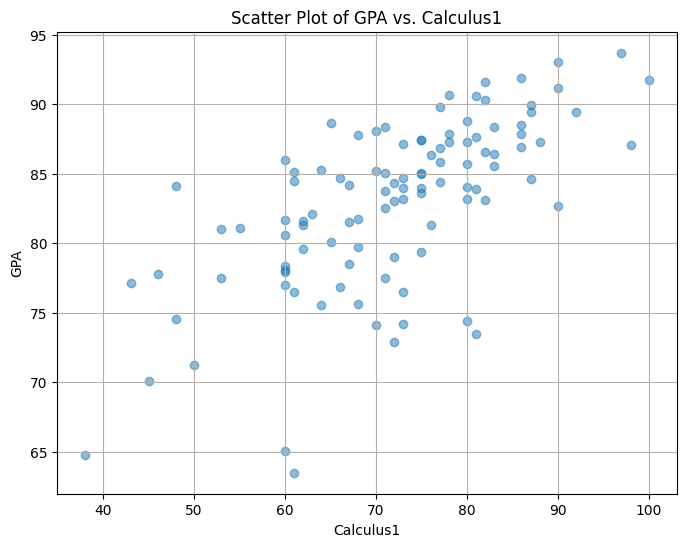

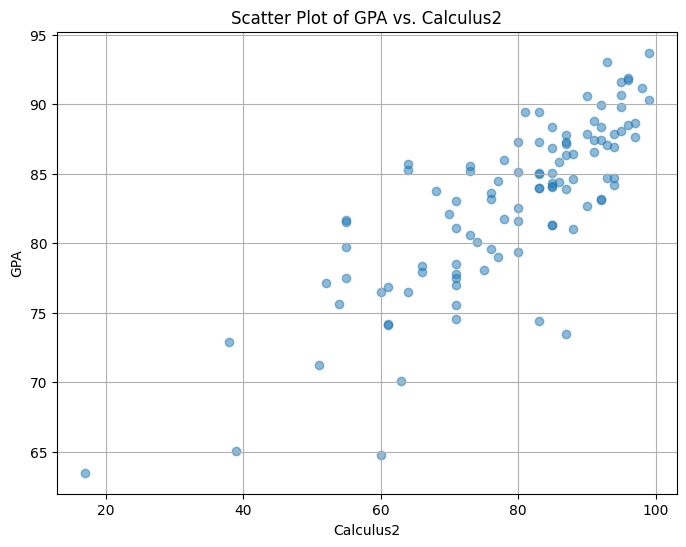

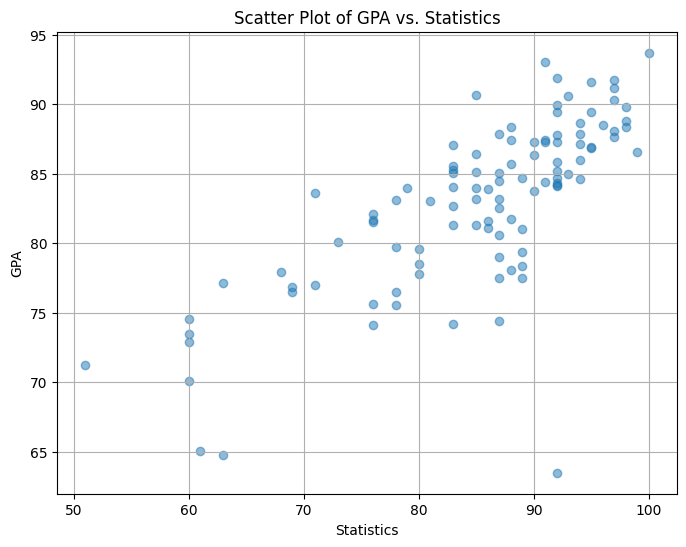

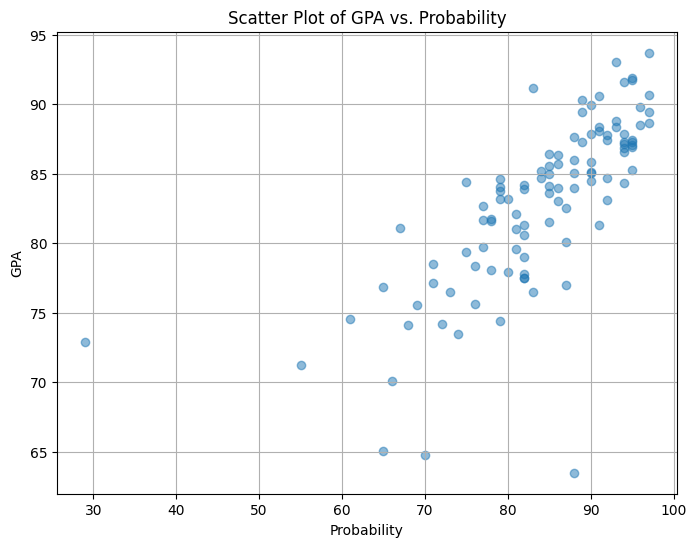

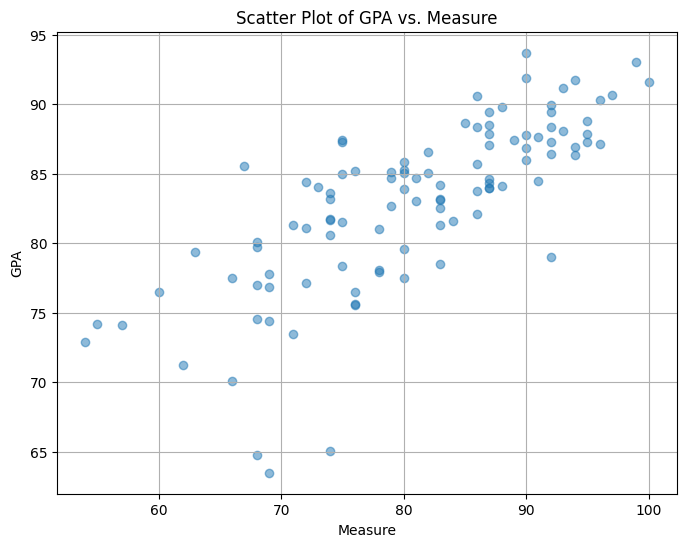

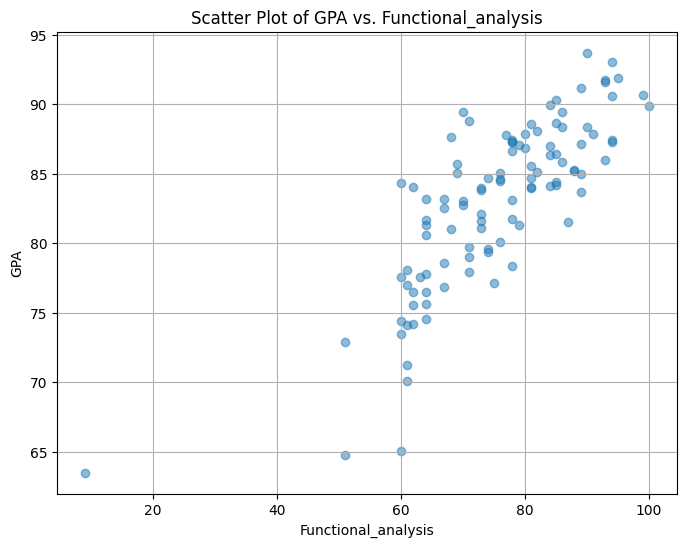

In [40]:
courses = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Create scatter plots
for course in courses:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[course], df['GPA'], alpha=0.5)
    plt.title(f'Scatter Plot of GPA vs. {course}')
    plt.xlabel(course)
    plt.ylabel('GPA')
    plt.grid(True)
    plt.show()

# 8.  Course Difficulty:  Which courses have the lowest average scores, indicating higher difficulty? 

In [41]:
# Define the list of courses
courses = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average score for each course
average_scores = df[courses].mean()

# Identify the courses with the lowest average scores
most_challenging_courses = average_scores[average_scores == average_scores.min()]

# Print the results
print("Courses with the lowest average scores, indicating higher difficulty:")
print(most_challenging_courses)

Courses with the lowest average scores, indicating higher difficulty:
Calculus1    71.961905
dtype: float64


# 8.  Course Difficulty:  Create a bar chart to show the average scores of each course, highlighting the most challenging courses.

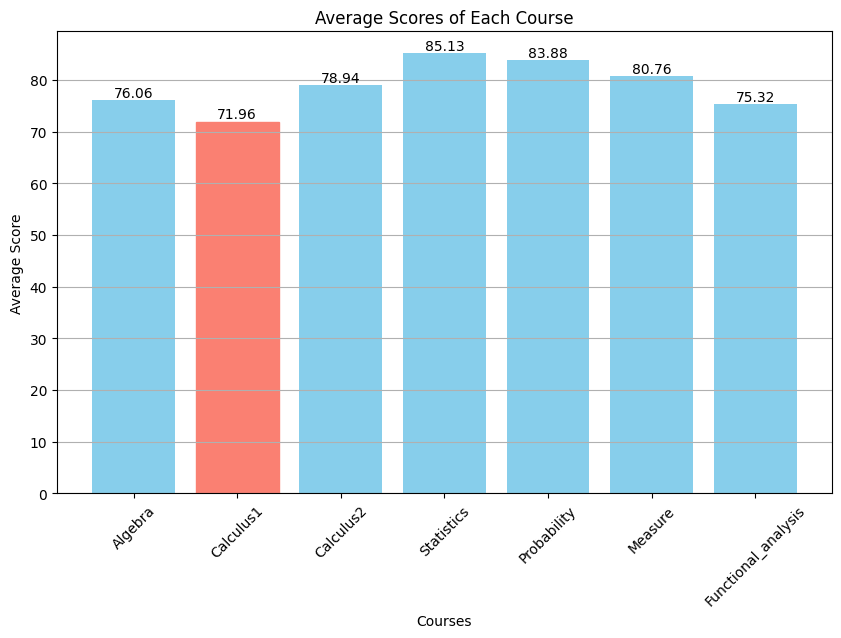

In [42]:
plt.figure(figsize=(10, 6))
bars = plt.bar(average_scores.index, average_scores.values, color='skyblue')

# Highlight the most challenging courses (with the lowest average scores)
min_avg_score = min(average_scores)
for bar in bars:
    if bar.get_height() == min_avg_score:
        bar.set_color('salmon')

plt.title('Average Scores of Each Course')
plt.xlabel('Courses')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add average score labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()